In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
#!pip install pqdm plotnine joblib pandas

In [4]:
plt.rcParams['figure.figsize'] = 20, 10

In [5]:
!mkdir -p images # crea carpeta de destino

In [6]:
import pandas as pd
from pqdm.threads import pqdm
from plotnine import *

import urllib.request
from joblib import Parallel, delayed

In [7]:
data = pd.read_csv('artemis_dataset_release_v0.csv')

In [8]:
len(data['painting'].unique())

80031

In [9]:
data['rand'] = data['painting'].rank(method='dense') 

In [10]:
data['rand_int'] = ((data['rand'] % 9) + 1).astype(int).astype(str)

In [11]:
data['address'] = 'https://uploads.wikiart.org/images/' + data['painting'].str.replace('_','/') + '.jpg'

In [12]:
data['painting'].str.replace('_','/')[0]

'vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890'

In [13]:
data['address'].iloc[0]

'https://uploads.wikiart.org/images/vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890.jpg'

In [14]:
data['address']

0         https://uploads.wikiart.org/images/vincent-van...
1         https://uploads.wikiart.org/images/vincent-van...
2         https://uploads.wikiart.org/images/vincent-van...
3         https://uploads.wikiart.org/images/vincent-van...
4         https://uploads.wikiart.org/images/vincent-van...
                                ...                        
454679    https://uploads.wikiart.org/images/gino-severi...
454680    https://uploads.wikiart.org/images/ivan-aivazo...
454681    https://uploads.wikiart.org/images/ivan-aivazo...
454682    https://uploads.wikiart.org/images/ivan-aivazo...
454683    https://uploads.wikiart.org/images/joan-miro/n...
Name: address, Length: 454684, dtype: object

In [15]:
data['address']

0         https://uploads.wikiart.org/images/vincent-van...
1         https://uploads.wikiart.org/images/vincent-van...
2         https://uploads.wikiart.org/images/vincent-van...
3         https://uploads.wikiart.org/images/vincent-van...
4         https://uploads.wikiart.org/images/vincent-van...
                                ...                        
454679    https://uploads.wikiart.org/images/gino-severi...
454680    https://uploads.wikiart.org/images/ivan-aivazo...
454681    https://uploads.wikiart.org/images/ivan-aivazo...
454682    https://uploads.wikiart.org/images/ivan-aivazo...
454683    https://uploads.wikiart.org/images/joan-miro/n...
Name: address, Length: 454684, dtype: object

In [16]:
def download_data(_id, url):
    import urllib.request
    
    urllib.request.urlretrieve(url, 'images/%s.jpg' % _id)

In [17]:
import os

In [18]:
to_download = data[['painting','address']].drop_duplicates()
to_download['filepath'] = 'images/'+to_download['painting'] + '.jpg'
to_download['downloaded'] = to_download['filepath'].apply(os.path.exists)
to_download = to_download[~to_download['downloaded']].copy()

In [19]:
len(to_download)

54093

In [20]:
54109

54109

In [21]:
def process_url(url):
    url

In [22]:
'https://uploads.wikiart.org/images/william--johnson/seated-female-nude-with-flowered-drape-1940(1).jpg'

'https://uploads.wikiart.org/images/william--johnson/seated-female-nude-with-flowered-drape-1940(1).jpg'

In [23]:
to_download['address_regexp'] = to_download['address'].str.replace('.-','-',regex=False)

In [24]:
download_tuples = list(to_download[['painting','address_regexp']].itertuples(index=None, name=None))

In [25]:
result = pqdm(download_tuples, lambda download_tuple: download_data(*download_tuple), n_jobs=32)

SUBMITTING | :   0%|          | 0/54093 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/54093 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/54093 [00:00<?, ?it/s]

In [83]:
download_tuples[0]

('william-h.-johnson_seated-female-nude-with-flowered-drape-1940(1)',
 'https://uploads.wikiart.org/images/william-h-johnson/seated-female-nude-with-flowered-drape-1940(1).jpg')

In [30]:
result[0]

<HTTPError 404: 'Not Found'>

<AxesSubplot:xlabel='emotion'>

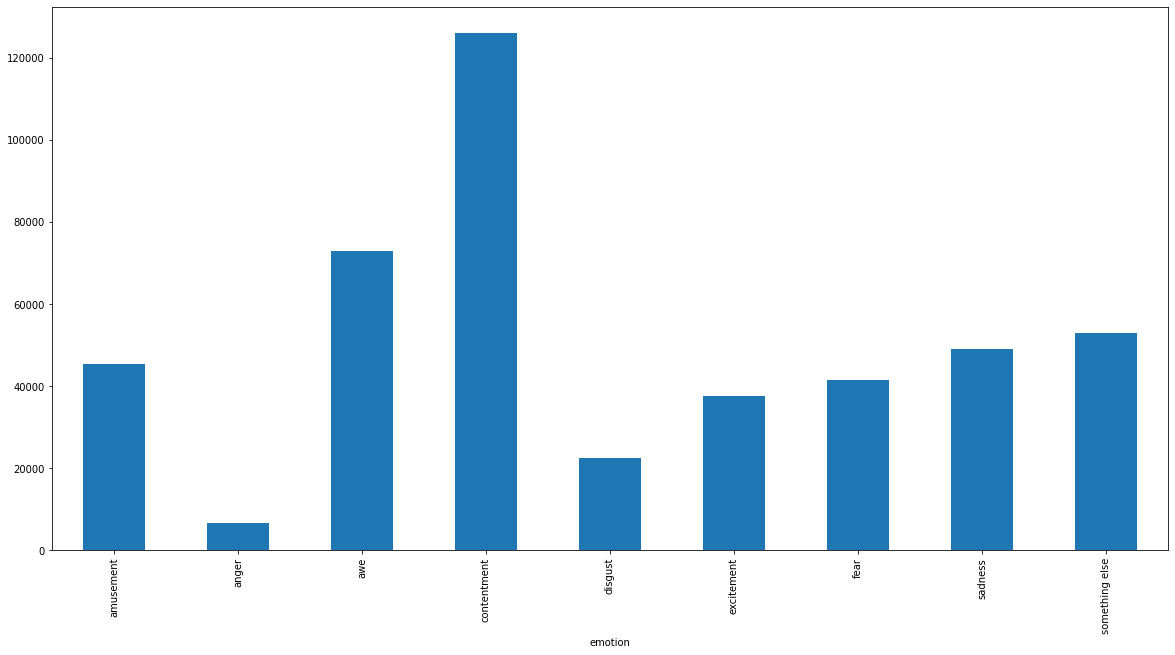

In [16]:
data.groupby('emotion').size().plot.bar()